# Project Description:

For this project, I created a model that can help in identifying loyal customers and predicting their next date of purchase, allowing marketing teams to create targeted campaigns based on that information.</br>

The data used in this project is an E-Commerce dataset from Kaggle, which contains actual transactions from UK retailers. <a href="https://www.kaggle.com/carrie1/ecommerce-data">data link</a>



# Import libraries 

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Data

In [2]:
df = pd.read_csv('data.csv',encoding= 'unicode_escape')

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

# Data cleaning 

### Colunms 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#chnage colunms names to lowercase
df.columns=df.columns.str.lower()
df.head(1)

invoiceno stockcode                         description  quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

      invoicedate  unitprice  customerid         country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom

In [6]:
#change data type for invoDate to date time
df.invoicedate = pd.to_datetime(df.invoicedate)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#split the date feature to year, month, day, hour. It would be helpful in the visulization part later on.
df['year'] = df['invoicedate'].dt.year
df['month'] = df['invoicedate'].dt.month
df['day'] = df['invoicedate'].dt.day
df['hour'] = df['invoicedate'].dt.hour


In [8]:
df.head(3)

invoiceno stockcode                         description  quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          invoicedate  unitprice  customerid         country  year  month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010     12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010     12   

   day  hour  
0    1     8  
1    1     8  
2    1     8

In [9]:
#change data type for customer ID to intger
df['customerid'] = df['customerid'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
 6   customerid   406829 non-null  Int64         
 7   country      541909 non-null  object        
 8   year         541909 non-null  int64         
 9   month        541909 non-null  int64         
 10  day          541909 non-null  int64         
 11  hour         541909 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 50.1+ MB


### Rows

In [10]:
df.shape

(541909, 12)

In [11]:
#change description to lower case
df['description']=df.description.str.lower()

In [12]:
df.head(2)

invoiceno stockcode                         description  quantity  \
0    536365    85123A  white hanging heart t-light holder         6   
1    536365     71053                 white metal lantern         6   

          invoicedate  unitprice  customerid         country  year  month  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  2010     12   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  2010     12   

   day  hour  
0    1     8  
1    1     8

In [13]:
#check for null values
df.isna().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
year                0
month               0
day                 0
hour                0
dtype: int64

In [14]:
#drop null values 
df=df.dropna()

In [15]:
df.isna().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
year           0
month          0
day            0
hour           0
dtype: int64

In [16]:
#check for duplicates 
df.duplicated().sum()

5225

In [17]:
#drop duplicated values 
df.drop_duplicates()

invoiceno stockcode                          description  quantity  \
0         536365    85123A   white hanging heart t-light holder         6   
1         536365     71053                  white metal lantern         6   
2         536365    84406B       cream cupid hearts coat hanger         8   
3         536365    84029G  knitted union flag hot water bottle         6   
4         536365    84029E       red woolly hottie white heart.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          pack of 20 spaceboy napkins        12   
541905    581587     22899         children's apron dolly girl          6   
541906    581587     23254        childrens cutlery dolly girl          4   
541907    581587     23255      childrens cutlery circus parade         4   
541908    581587     22138        baking set 9 piece retrospot          3   

               invoicedate  unitprice  customerid         country  year  \
0      2010-12-01 08:26:00       2.55       17850  United Kingdom  2010   
1      2010-12-01 08:26:00       3.39       17850  United Kingdom  2010   
2      2010-12-01 08:26:00       2.75       17850  United Kingdom  2010   
3      2010-12-01 08:26:00       3.39       17850  United Kingdom  2010   
4      2010-12-01 08:26:00       3.39       17850  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
541904 2011-12-09 12:50:00       0.85       12680          France  2011   
541905 2011-12-09 12:50:00       2.10       12680          France  2011   
541906 2011-12-09 12:50:00       4.15       12680          France  2011   
541907 2011-12-09 12:50:00       4.15       12680          France  2011   
541908 2011-12-09 12:50:00       4.95       12680          France  2011   

        month  day  hour  
0          12    1     8  
1          12    1     8  
2          12    1     8  
3          12    1     8  
4          12    1     8  
...       ...  ...   ...  
541904     12    9    12  
541905     12    9    12  
541906     12    9    12  
541907     12    9    12  
541908     12    9    12  

[401604 rows x 12 columns]

In [18]:
df.shape

(406829, 12)

In [19]:
#check data for null values  
df = df.replace(" ", np.nan).replace("N/A", np.nan ).replace("NA", np.nan).replace("", np.nan)
df.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
year           0
month          0
day            0
hour           0
dtype: int64

In [20]:
#check if there is zero quantity ==> zero quantity means cancelled orders!, we can see that their invoice no starts with C.
df[df['quantity']<= 0]

invoiceno stockcode                       description  quantity  \
141      C536379         D                          discount        -1   
154      C536383    35004C   set of 3 coloured  flying ducks        -1   
235      C536391     22556    plasters in tin circus parade        -12   
236      C536391     21984  pack of 12 pink paisley tissues        -24   
237      C536391     21983  pack of 12 blue paisley tissues        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   zinc t-light holder stars small       -11   
541541   C581499         M                            manual        -1   
541715   C581568     21258        victorian sewing box large        -5   
541716   C581569     84978  hanging heart jar t-light holder        -1   
541717   C581569     20979     36 pencils tube red retrospot        -5   

               invoicedate  unitprice  customerid         country  year  \
141    2010-12-01 09:41:00      27.50       14527  United Kingdom  2010   
154    2010-12-01 09:49:00       4.65       15311  United Kingdom  2010   
235    2010-12-01 10:24:00       1.65       17548  United Kingdom  2010   
236    2010-12-01 10:24:00       0.29       17548  United Kingdom  2010   
237    2010-12-01 10:24:00       0.29       17548  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
540449 2011-12-09 09:57:00       0.83       14397  United Kingdom  2011   
541541 2011-12-09 10:28:00     224.69       15498  United Kingdom  2011   
541715 2011-12-09 11:57:00      10.95       15311  United Kingdom  2011   
541716 2011-12-09 11:58:00       1.25       17315  United Kingdom  2011   
541717 2011-12-09 11:58:00       1.25       17315  United Kingdom  2011   

        month  day  hour  
141        12    1     9  
154        12    1     9  
235        12    1    10  
236        12    1    10  
237        12    1    10  
...       ...  ...   ...  
540449     12    9     9  
541541     12    9    10  
541715     12    9    11  
541716     12    9    11  
541717     12    9    11  

[8905 rows x 12 columns]

In [21]:
#drop cancelled orders 
df.drop(df[df['quantity'] <= 0].index, inplace = True)

In [22]:
df.shape

(397924, 12)

# Feature Engineering 

In this step, I will create a new column and name it ==> total_spent, which contains the amount of money spent by each customer. </br>
**Total spent = quantity * unit price**

In [23]:
df['total_amount'] = df['quantity'] * df['unitprice']

In [24]:
df.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          invoicedate  unitprice  customerid         country  year  month  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  2010     12   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  2010     12   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  2010     12   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  2010     12   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  2010     12   

   day  hour  total_amount  
0    1     8         15.30  
1    1     8         20.34  
2    1     8         22.00  
3    1     8         20.34  
4    1     8         20.34

In [25]:
df.shape

(397924, 13)

# Exploratory Data Analysis (EDA)

**My goal here to discover any intersting pattrens in the data and try to explore the customers behavior in depth.**

### Let's find the Top 5 countries:

In [26]:
 #Countries
import plotly.express as px

s=df['country'].value_counts()
s=s[:5,]

for template in ['seaborn']:
    fig = px.pie( values=s.values,names=s.index,
                     template=template)

fig.update_layout(title_text='Top 5 Countries', title_x=0.5,showlegend=True)



fig.show()

**Chart Observation:**
Most of the customers are from the United Kingdom, which can indicate that the highest revenues of the company come from their customers from the United Kingdom as well.

### Which country with the highest revenues?

In [31]:
#country vs sales
country_sales = df.groupby(['country']).sum()['total_amount'].reset_index().sort_values(by='total_amount', ascending = False)
country_sales.head(10) 

for template in ['seaborn']:
     fig= px.bar(country_sales.head(10), x='country', y='total_amount',
                labels=dict(country='Country', total_amount='Total Revenues'),
                     template=template)

fig.update_layout(title_text='Total Revenues By Country', title_x=0.5,showlegend=True ,title_font_color='navy',)



fig.show()

**Chart Observation:**
As I guessed before, The united kingdom ranked the highest revenues among the other countries. Since the store is located in the UK, it makes sense that the UK customers bring the highest revenues to the store.

### Which customers have spent the most?

Text(0.5, 1.0, 'Top 10 Customers by Total Spent')

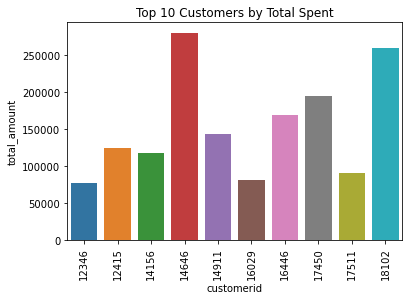

In [32]:
#customers vs total amount
top_spenders = df.groupby(['customerid']).sum()['total_amount'].reset_index().sort_values(by='total_amount', ascending = False)
top_spenders.head(10) 
sns.barplot(y = 'total_amount', x = 'customerid', data = top_spenders.head(10))
plt.xticks(rotation = 'vertical')
plt.title('Top 10 Customers by Total Spent')

### Which month ranked the highest revenues?

In [33]:
#order vs month
df['month_sales'] = pd.to_datetime(df['invoicedate']).dt.month
month_sales = df.groupby(['month_sales'],as_index = False).agg({'total_amount':'sum'})

In [34]:
month_sales

month_sales  total_amount
0             1    569445.040
1             2    447137.350
2             3    595500.760
3             4    469200.361
4             5    678594.560
5             6    661213.690
6             7    600091.011
7             8    645343.900
8             9    952838.382
9            10   1039318.790
10           11   1161817.380
11           12   1090906.680

In [35]:
for template in ['seaborn']:
    fig = px.line(month_sales, x='month_sales', y= 'total_amount', text='month_sales',
              labels=dict(month_sales='Months', total_amount='Total Revenues'),
                     template=template)

fig.update_layout(title_text='Total Revenues By Month', title_x=0.5,title_font_color='navy',  
        xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12],
        ticktext = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December'],
            tickangle = 45
    ))
fig.update_traces(textposition='bottom center')
fig.show()

**Chart Observation:**
It seems that December and November were the busiest months and ranked the highest revenues.

### What time is the best for launching a new campign/Advertisments?

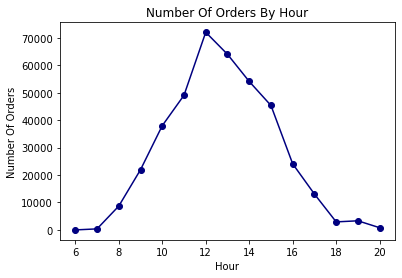

In [36]:
#order vs hour
orders_per_hour=df.groupby(['hour'])['invoicedate'].count()
hours= [hour for hour, df in df.groupby('hour')]

ax= plt.axes()
ax.plot(hours,orders_per_hour, color='navy',marker='o')
ax.set(xlabel='Hour', ylabel='Number Of Orders',
       title='Number Of Orders By Hour')
#ax.set_xlim([5, 20])

plt.show()

**Chart Observation:**
The customers tend to order at the afternoon hours,between 12 o'clock to 14 o'clock, and it would be the perfect apportunity for a company  to promote their new product or launch a marketing campaign during that time period.

### What product sold the most?and why ?

Text(0.5, 1.0, 'Top 10 Sold Product')

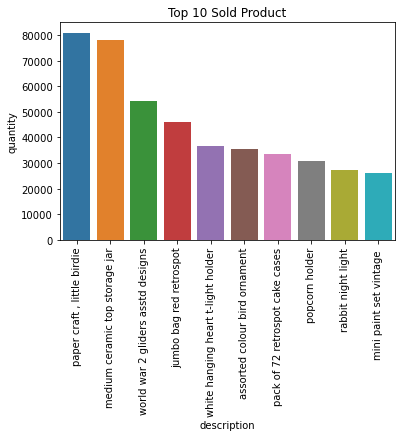

In [37]:
top_product = df.groupby(['description']).sum()['quantity'].reset_index().sort_values(by='quantity', ascending = False)
top_product.head(10) 
sns.barplot(y = 'quantity', x = 'description', data = top_product.head(10))
plt.xticks(rotation = 'vertical')
plt.title('Top 10 Sold Product')

**Chart Observation:**
It is seems that paper craft is the most purchased product by the customers. It could be due to it is cheap price or high demands. The company can use this info to promote new products similer to this product.

### Checking for correlation 

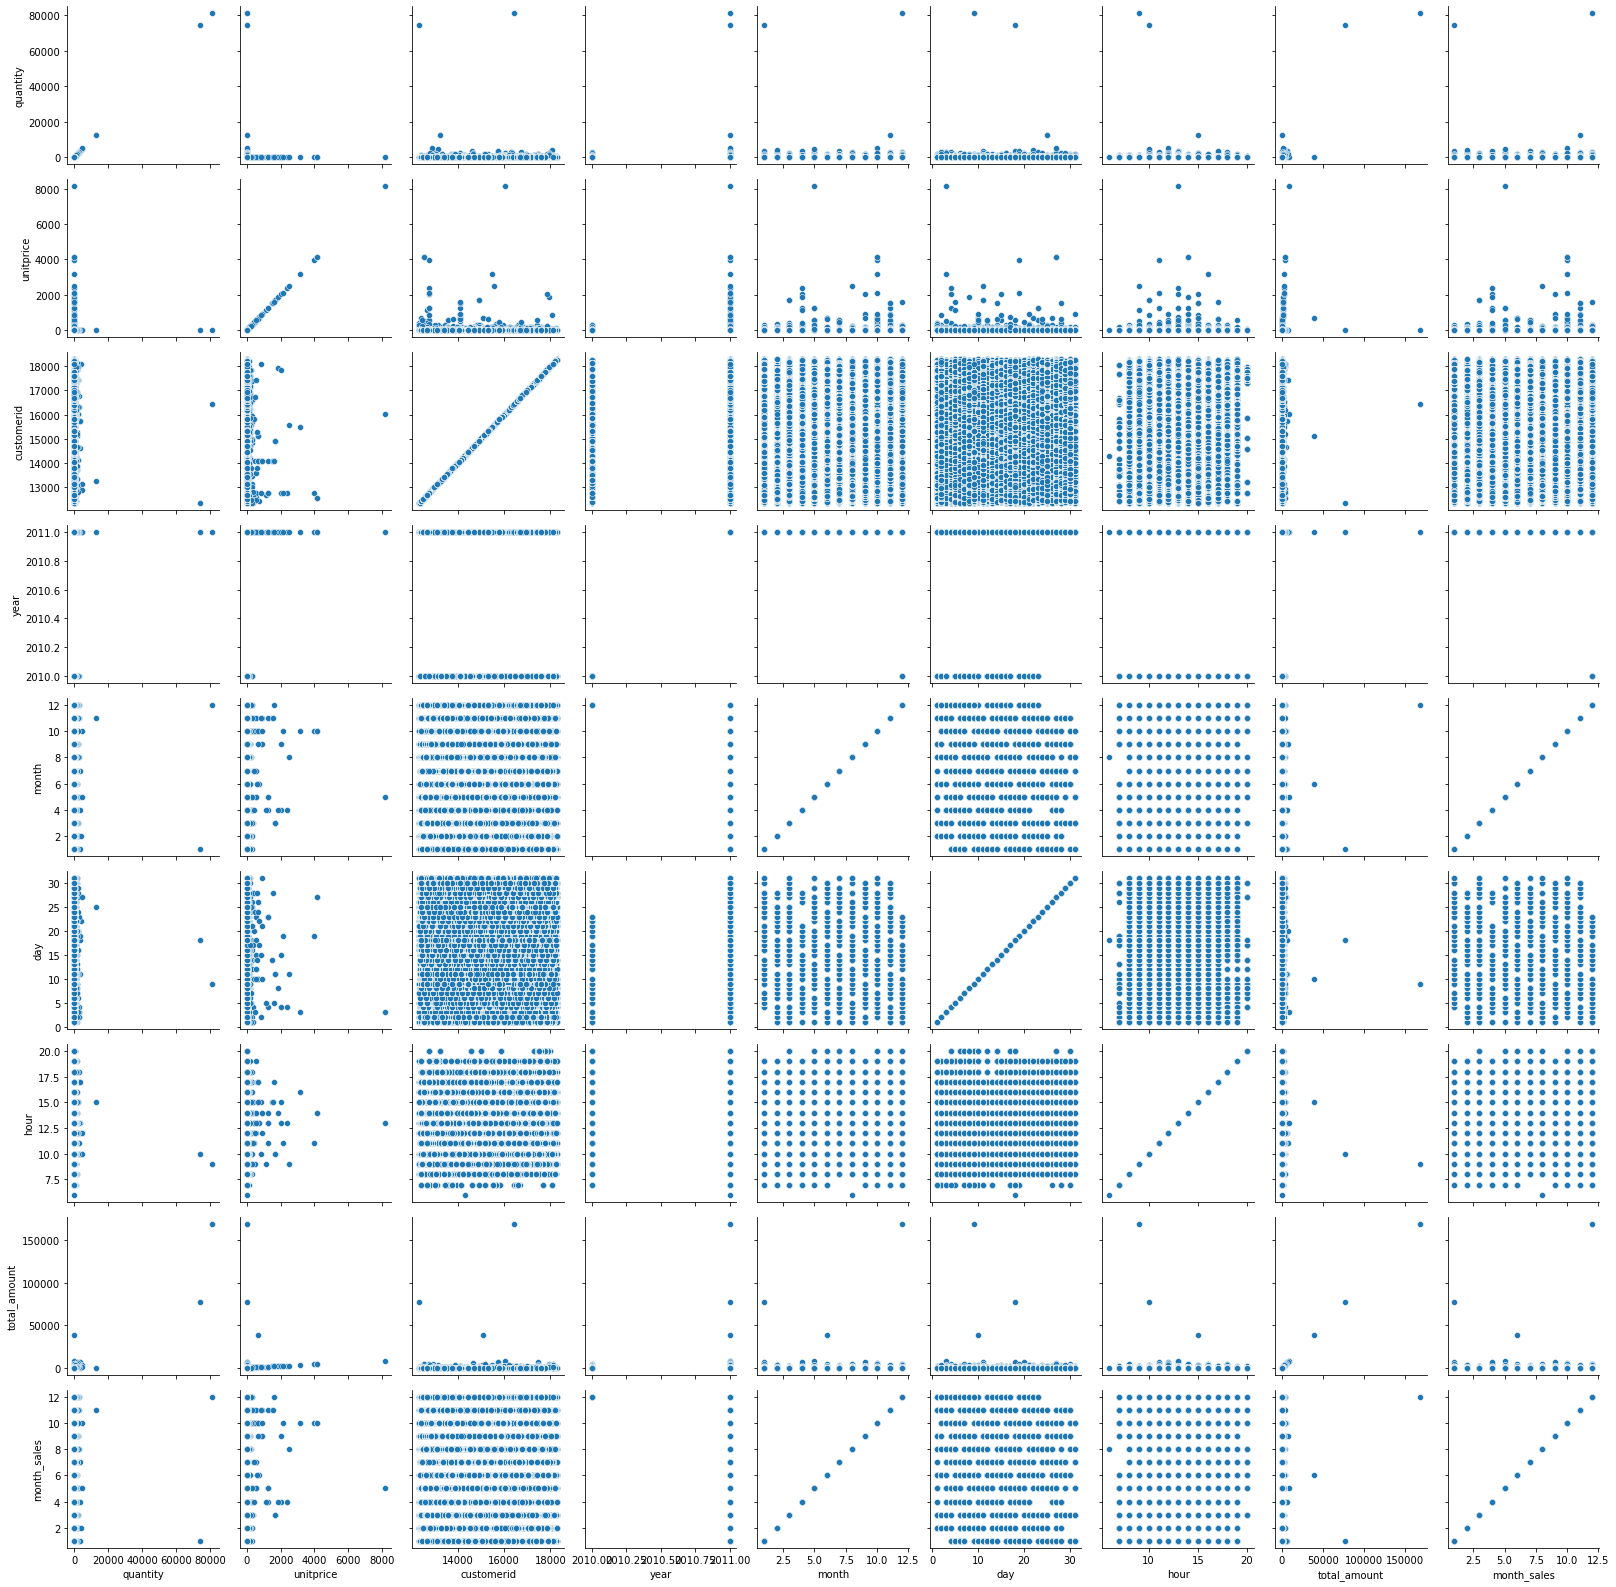

In [119]:
#take a look at the relationship between the data features
g = sns.PairGrid(df)
g.map(sns.scatterplot);

## Data Preprocessing and Wrangling 

**Since my goal is to predict the next date that the customer will purchase, then i need to focus on the invoicedate feature.**

In [36]:
#First let see what the max and min purchase date in the data
print('Max=', df['invoicedate'].max(), " Min=", df['invoicedate'].min())

Max= 2011-12-09 12:50:00  Min= 2010-12-01 08:26:00


**Here we can see that the data has transaction for 12 months and 9 days. Now, let's split the data to two data frames ==> one part I will use it to predict the other part.**

Let's split the df to:</br>
- df_customer: date from 01-12-2010 to 30-08-2011</br>
- df_next_date: date from 1-09-2011 to 09-12-2011

In [50]:
#data frame contains approximatly 9 months of transactions
df_customer = df[(df.invoicedate < pd.Timestamp(2011,8,30)) & (df.invoicedate >= pd.Timestamp(2010,12,1))].reset_index(drop=True)

In [51]:
df_customer.head(3)

invoiceno stockcode                         description  quantity  \
0    536365    85123A  white hanging heart t-light holder         6   
1    536365     71053                 white metal lantern         6   
2    536365    84406B      cream cupid hearts coat hanger         8   

          invoicedate  unitprice  customerid         country  year  month  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  2010     12   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  2010     12   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  2010     12   

   day  hour  total_amount  
0    1     8         15.30  
1    1     8         20.34  
2    1     8         22.00

In [52]:
#data frame contains 3 months of transactions
df_next_date=df[(df.invoicedate < pd.Timestamp(2011,12,9)) & (df.invoicedate >= pd.Timestamp(2011,9,1))].reset_index(drop=True)

In [54]:
df_next_date.head(3)

invoiceno stockcode                 description  quantity  \
0    565080     20677          pink polkadot bowl         8   
1    565080     22128  party cones candy assorted        24   
2    565082     22423    regency cakestand 3 tier         2   

          invoicedate  unitprice  customerid         country  year  month  \
0 2011-09-01 08:25:00       1.25       13509  United Kingdom  2011      9   
1 2011-09-01 08:25:00       1.25       13509  United Kingdom  2011      9   
2 2011-09-01 09:15:00      12.75       13305  United Kingdom  2011      9   

   day  hour  total_amount  
0    1     8          10.0  
1    1     8          30.0  
2    1     9          25.5

**Now I will create a new coulmn and name it ==> NextPurchaseDate, which will conians the number of days past after customer last purchase.**

In [90]:
#find the first purcahse date & the last purchase date of a customer ==> min & max
min_date=df_next_date.groupby('customerid').invoicedate.min().reset_index()
max_date=df_customer.groupby('customerid').invoicedate.max().reset_index()


In [92]:
df_purchase_dates = pd.merge(min_date, max_date, on='customerid', how='left')

In [94]:
df_purchase_dates.head()

customerid       invoicedate_x       invoicedate_y
0       12347 2011-10-31 12:25:00 2011-08-02 08:48:00
1       12348 2011-09-25 13:13:00 2011-04-05 10:47:00
2       12349 2011-11-21 09:51:00                 NaT
3       12352 2011-09-20 14:34:00 2011-03-22 16:08:00
4       12356 2011-11-17 08:40:00 2011-04-08 12:33:00

In [95]:
#rename
df_purchase_dates.columns = ['customerid', 'min_purchase_date','max_purchase_date']

In [96]:
df_purchase_dates.head()

customerid   min_purchase_date   max_purchase_date
0       12347 2011-10-31 12:25:00 2011-08-02 08:48:00
1       12348 2011-09-25 13:13:00 2011-04-05 10:47:00
2       12349 2011-11-21 09:51:00                 NaT
3       12352 2011-09-20 14:34:00 2011-03-22 16:08:00
4       12356 2011-11-17 08:40:00 2011-04-08 12:33:00

In [106]:
#calculate the difference between the last date and the first date 
df_purchase_dates['next_purchase_date'] = (df_purchase_dates['min_purchase_date'] - df_purchase_dates['max_purchase_date']).dt.days

In [107]:
df_purchase_dates

customerid   min_purchase_date   max_purchase_date  next_purchase_date
0          12347 2011-10-31 12:25:00 2011-08-02 08:48:00                90.0
1          12348 2011-09-25 13:13:00 2011-04-05 10:47:00               173.0
2          12349 2011-11-21 09:51:00                 NaT                 NaN
3          12352 2011-09-20 14:34:00 2011-03-22 16:08:00               181.0
4          12356 2011-11-17 08:40:00 2011-04-08 12:33:00               222.0
...          ...                 ...                 ...                 ...
2966       18277 2011-10-12 15:22:00                 NaT                 NaN
2967       18278 2011-09-27 11:58:00                 NaT                 NaN
2968       18282 2011-12-02 11:43:00 2011-08-05 13:35:00               118.0
2969       18283 2011-09-05 12:35:00 2011-07-14 13:20:00                52.0
2970       18287 2011-10-12 10:23:00 2011-05-22 10:39:00               142.0

[2971 rows x 4 columns]

In [112]:
#craete a new datframe that contains customer id 
df_1= pd.DataFrame(df_customer['customerid'].unique())

In [114]:
df_1.columns = ['customerid']

In [116]:
df_1.head()

customerid
0       17850
1       13047
2       12583
3       13748
4       15100

In [117]:
#Add next_purchase_date to df_1
df_1= pd.merge(df_1, df_purchase_dates[['customerid', 'next_purchase_date']], on='customerid', how='left')

In [119]:
#check for null values
df_1.isna().sum()

customerid               0
next_purchase_date    1364
dtype: int64

In [120]:
#drop null values
df_1=df_1.dropna()

In [121]:
df_1.isna().sum()

customerid            0
next_purchase_date    0
dtype: int64

# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behaviour to divide customers into groups.</br>

**In this project, three new customer attriubite will be created:</br>**
- RECENCY (R): Days since last purchase</br>
- FREQUENCY (F): Total number of purchases</br>
- MONETARY VALUE (M): Total money this customer spent</br>

### Recency

In this part, I will calculate how many days were passed from the last date a customer has made a purchase.

In [122]:
#find the max date purchased in df_customer
max_date=df_customer.groupby('customerid').invoicedate.max().reset_index()

In [124]:
max_date.columns = ['customerid','max_purchase_date']

In [126]:
max_date.head(2)

customerid   max_purchase_date
0       12346 2011-01-18 10:01:00
1       12347 2011-08-02 08:48:00

In [127]:
max_date['recency'] = (max_date['max_purchase_date'].max() - max_date['max_purchase_date']).dt.days

In [128]:
max_date.head(2)

customerid   max_purchase_date  recency
0       12346 2011-01-18 10:01:00      222
1       12347 2011-08-02 08:48:00       26

In [129]:
#Add recency to df_1
df_1= pd.merge(df_1, max_date[['customerid', 'recency']], on='customerid', how='left')

In [130]:
df_1.head(2)

customerid  next_purchase_date  recency
0       13047                70.0       23
1       12583                26.0        3

In [131]:
pd.DataFrame(df_1.recency.describe())


recency
count  1944.000000
mean     70.278807
std      68.181024
min       0.000000
25%      17.000000
50%      46.000000
75%     102.000000
max     270.000000

<AxesSubplot:xlabel='recency', ylabel='Count'>

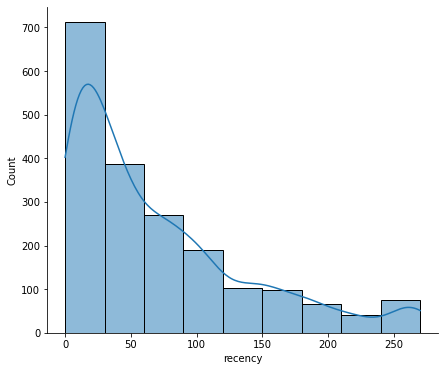

In [132]:
#plot recency

f, ax = plt.subplots(figsize=(7, 6))
sns.despine(f)

sns.histplot(df_1['recency'], binwidth=30, kde=True)


## Using Elbow method to assign values to the recency attribute. This method will help finding the optimal number of clusters reccomeended to use before applying K-means clustering.

In [133]:
X = df_1[['recency']]


In [134]:
from sklearn.cluster import KMeans
elbows = []
for i in range(1,16):
    km = KMeans(n_clusters= i,#K
            init = 'random',
            max_iter = 150,
            random_state = 42 
           )
    km.fit(X)
#     print(km.inertia_)
    elbows.append(km.inertia_)

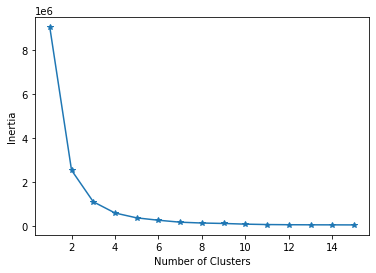

In [135]:
#     Plot Result of For loop
plt.plot(range(1,16),  elbows, marker = "*")
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.show()

### We can see that the optimal number of clusters is 3

In [136]:
#Now we can find the recency_clusters

km1 = KMeans(n_clusters=3) # ==>0 to 2
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding new coulmn
df_1['recency_clusters'] = y
#The new dataframe with the clustering done
df_1.head()

customerid  next_purchase_date  recency  recency_clusters
0       13047                70.0       23                 0
1       12583                26.0        3                 0
2       13748               136.0      129                 2
3       15291                77.0       69                 2
4       14688                36.0       26                 0

In [137]:
df_1.groupby('recency_clusters')['recency'].describe()

count        mean        std    min     25%    50%    75%  \
recency_clusters                                                               
0                 1099.0   22.804368  16.405576    0.0    9.00   20.0   35.0   
1                  268.0  207.522388  39.785043  153.0  172.75  196.0  255.0   
2                  577.0   96.956672  25.637359   60.0   76.00   94.0  112.0   

                    max  
recency_clusters         
0                  59.0  
1                 270.0  
2                 152.0

In [149]:
#Function to show the percentage of a bar
def bar_percentage(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 14)
    plt.show()

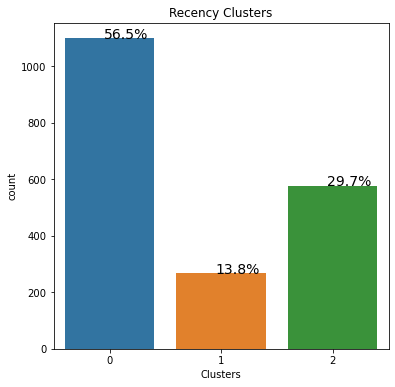

In [153]:
plt.figure(figsize=(6,6))

ax= sns.countplot(x='recency_clusters', data=df_1)
plt.xlabel('Clusters')
plt.title('Recency Clusters')
bar_percentage(ax,df_1['recency_clusters'])

### Based on the table above, we can see that customers in the cluster 0 are the most active ones and they are the half of the customers, whereas customers in cluster 1 are the most inactive.

### Frequency
Here i will calculate how many times a customer has made a purchase from this store.

In [154]:
#creeate a new dataframe called : orders_count, and assign to it the orders count of each customer
orders_count= df.groupby('customerid').invoicedate.count().reset_index()

In [155]:
orders_count

customerid  invoicedate
0          12346            1
1          12347          182
2          12348           31
3          12349           73
4          12350           17
...          ...          ...
4334       18280           10
4335       18281            7
4336       18282           12
4337       18283          756
4338       18287           70

[4339 rows x 2 columns]

In [156]:
orders_count.columns = ['customerid', 'frequency']

In [157]:
#merge the two dataframes
df_1=df_1.merge(orders_count, on='customerid', how='left')

In [158]:
df_1

customerid  next_purchase_date  recency  recency_clusters  frequency
0          13047                70.0       23                 0        172
1          12583                26.0        3                 0        247
2          13748               136.0      129                 2         28
3          15291                77.0       69                 2        103
4          14688                36.0       26                 0        327
...          ...                 ...      ...               ...        ...
1939       13812                41.0        2                 0         36
1940       14141                31.0        2                 0         40
1941       12492                42.0        2                 0         20
1942       17183                51.0        2                 0         73
1943       14869                94.0        0                 0         71

[1944 rows x 5 columns]

<Figure size 720x720 with 0 Axes>

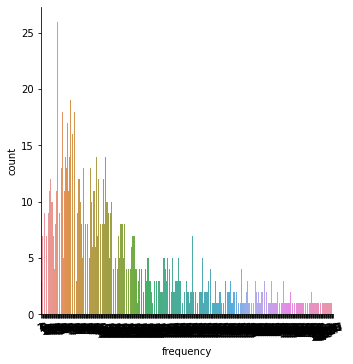

In [170]:
#plot frequency
plt.figure(figsize=(10,10))

g=sns.catplot(x='frequency', data=df_1,kind="count")
g.set_xticklabels(rotation = 30)


### Now apply the elbow method to find the frquncy clusters.

In [173]:
X=df_1[['frequency']]

In [174]:
#elbow method
from sklearn.cluster import KMeans
elbows = []
for i in range(1,16):
    km = KMeans(n_clusters= i,#K
            init = 'random',
            max_iter = 150,
            random_state = 42 
           )
    km.fit(X)
#     print(km.inertia_)
    elbows.append(km.inertia_)

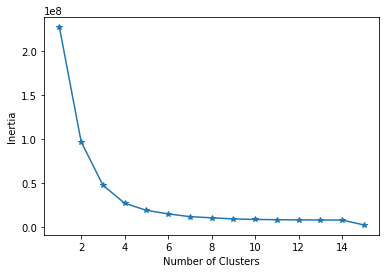

In [119]:
#plot elbow method
plt.plot(range(1,16),  elbows, marker = "*")
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.show()

### We can see that the optimal number of clusters is 3, cause the line chart didn't change much after that.

In [175]:
#k-means clustring to find frequency_clusters

km1 = KMeans(n_clusters=3) # ==>0 to 2
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding new coulmn
df_1['frequency_clusters'] = y
#The new dataframe with the clustering done
df_1.head()

customerid  next_purchase_date  recency  recency_clusters  frequency  \
0       13047                70.0       23                 0        172   
1       12583                26.0        3                 0        247   
2       13748               136.0      129                 2         28   
3       15291                77.0       69                 2        103   
4       14688                36.0       26                 0        327   

   frequency_clusters  
0                   0  
1                   2  
2                   0  
3                   0  
4                   2

In [176]:
#statistic analysis
df_1.groupby('frequency_clusters')['frequency'].describe()

count         mean          std     min     25%     50%  \
frequency_clusters                                                             
0                   1603.0    85.590767    56.896645     2.0    39.0    75.0   
1                      3.0  6040.000000  1655.619824  4596.0  5136.5  5677.0   
2                    315.0   374.460317   131.040717   232.0   273.5   330.0   
3                     23.0  1344.217391   495.363682   898.0   976.5  1137.0   

                       75%     max  
frequency_clusters                  
0                    122.0   230.0  
1                   6762.0  7847.0  
2                    441.5   851.0  
3                   1569.5  2700.0

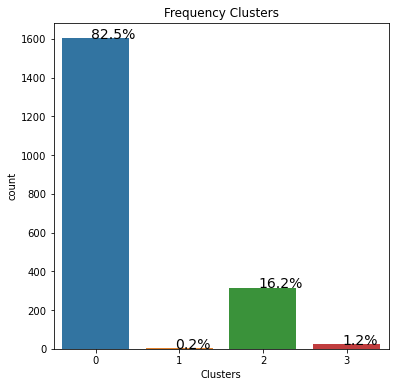

In [177]:
plt.figure(figsize=(6,6))

ax= sns.countplot(x='frequency_clusters', data=df_1)
plt.xlabel('Clusters')
plt.title('Frequency Clusters')
bar_percentage(ax,df_1['frequency_clusters'])

### Based on the table and chart above, we can see that customers in the cluster 0 has the least number of orders, whereas customers in cluster 1 has the most number of orders.

### Monetary
Here we will see how much a customer spent over time.

In [127]:
df.head(1)

invoiceno stockcode                         description  quantity  \
0    536365    85123A  white hanging heart t-light holder         6   

          invoicedate  unitprice  customerid         country  total_amount  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom          15.3

In [178]:
#create a dataframe which has customer id and total amount of what the cutomer spent over time.
cutomer_revenues = df.groupby('customerid').total_amount.sum().reset_index()


In [180]:
cutomer_revenues.head(3)

customerid  total_amount
0       12346      77183.60
1       12347       4310.00
2       12348       1797.24

In [181]:
#merge it with the df_1
df_1 = pd.merge(df_1, cutomer_revenues, on='customerid')

In [182]:
df_1.head(3)

customerid  next_purchase_date  recency  recency_clusters  frequency  \
0       13047                70.0       23                 0        172   
1       12583                26.0        3                 0        247   
2       13748               136.0      129                 2         28   

   frequency_clusters  total_amount  
0                   0       3237.54  
1                   2       7281.38  
2                   0        948.25

In [183]:
df_1 = df_1.rename(columns={'total_amount': 'monetary'})

In [184]:
df_1.head(3)

customerid  next_purchase_date  recency  recency_clusters  frequency  \
0       13047                70.0       23                 0        172   
1       12583                26.0        3                 0        247   
2       13748               136.0      129                 2         28   

   frequency_clusters  monetary  
0                   0   3237.54  
1                   2   7281.38  
2                   0    948.25

<AxesSubplot:xlabel='monetary', ylabel='Count'>

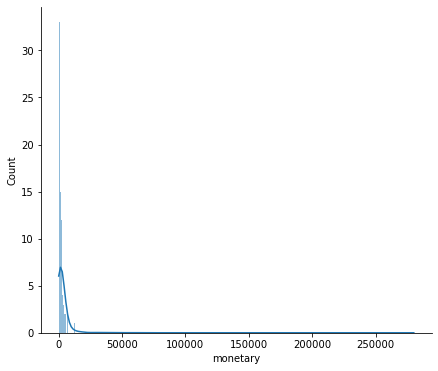

In [185]:
#plot monetary

f, ax = plt.subplots(figsize=(7, 6))
sns.despine(f)

sns.histplot(df_1['monetary'], binwidth=30, kde=True)


### Now apply elbow method to find monetary clusters 

In [186]:
X=df_1[['monetary']]

In [187]:
#elbow method
from sklearn.cluster import KMeans
elbows = []
for i in range(1,16):
    km = KMeans(n_clusters= i,#K
            init = 'random',
            max_iter = 150,
            random_state = 42 
           )
    km.fit(X)
#     print(km.inertia_)
    elbows.append(km.inertia_)

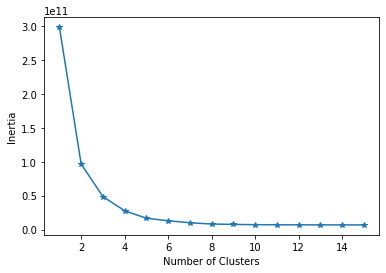

In [188]:
#plot elbow method
plt.plot(range(1,16),  elbows, marker = "*")
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.show()

### We can see that the optimal number of clusters is 3, cause the line chart didn't change much after that.

In [189]:
#k-means clustring to find monetary_clusters

km1 = KMeans(n_clusters=3) # ==>0 to 2
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding new coulmn
df_1['monetary_clusters'] = y
#The new dataframe with the clustering done
df_1.head()

customerid  next_purchase_date  recency  recency_clusters  frequency  \
0       13047                70.0       23                 0        172   
1       12583                26.0        3                 0        247   
2       13748               136.0      129                 2         28   
3       15291                77.0       69                 2        103   
4       14688                36.0       26                 0        327   

   frequency_clusters  monetary  monetary_clusters  
0                   0   3237.54                  0  
1                   2   7281.38                  0  
2                   0    948.25                  0  
3                   0   4668.30                  0  
4                   2   5630.87                  0

In [190]:
#statistic analysis
df_1.groupby('monetary_clusters')['monetary'].describe()

count           mean           std        min         25%  \
monetary_clusters                                                               
0                  1925.0    2688.883570   3770.754540      36.56     791.330   
1                     3.0  244804.703333  44717.494646  194550.79  227104.045   
2                    16.0   72741.083125  30882.340879   40991.57   53782.430   

                          50%         75%        max  
monetary_clusters                                     
0                    1540.420    3029.870   37153.85  
1                  259657.300  269931.660  280206.02  
2                   59796.865   83534.225  143825.06

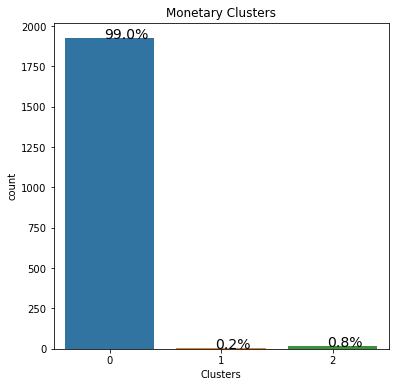

In [191]:
plt.figure(figsize=(6,6))

ax= sns.countplot(x='monetary_clusters', data=df_1)
plt.xlabel('Clusters')
plt.title('Monetary Clusters')
bar_percentage(ax,df_1['monetary_clusters'])

### Based on the table and chart above, we can see that most customers are in cluster 0.

## Calculating RFM score
Here I will add a new column to my data called: overall_score, which will contains the sum of the RFM clusters scores.

In [192]:
#create the new feature
df_1['overall_score']=df_1['recency_clusters'] + df_1['frequency_clusters']+ df_1['monetary_clusters']

In [194]:
#find the average
df_1.groupby('overall_score')[['recency', 'frequency', 'monetary']].mean()

recency    frequency      monetary
overall_score                                       
0               24.236453    98.072660   2642.654225
1              207.486381    75.688716   1124.264708
2               72.299363   177.058599   3271.307989
3               77.666667  1167.333333  25002.742121
4               81.538462   373.019231  16672.514423
5               12.000000  1639.400000  75912.608000

### As shown in the table above, the customers with overall score= 5 are the Top valued customers. Whereas the customers with overall score= 0, those ones who are considered lost customers.
- Overall score = 1 ===> Low value customers</br>
- Overall score = 2&3 ===> Medium value customers</br>
- Overall score = 4 ===> High value customers


In [196]:
#Rating customer based upon the RFM score
df_1['rate'] = 'Lost Cutomer'
df_1.loc[df_1['overall_score'] > 0, 'rate'] = 'Low-Value'
df_1.loc[df_1['overall_score'] >= 2, 'rate'] = 'Medium-Value'
df_1.loc[df_1['overall_score'] == 4, 'rate'] = 'High-Value'
df_1.loc[df_1['overall_score'] == 5, 'rate'] = 'Top Customer'

In [197]:
df_1.head()

customerid  next_purchase_date  recency  recency_clusters  frequency  \
0       13047                70.0       23                 0        172   
1       12583                26.0        3                 0        247   
2       13748               136.0      129                 2         28   
3       15291                77.0       69                 2        103   
4       14688                36.0       26                 0        327   

   frequency_clusters  monetary  monetary_clusters  overall_score  \
0                   0   3237.54                  0              0   
1                   2   7281.38                  0              2   
2                   0    948.25                  0              2   
3                   0   4668.30                  0              2   
4                   2   5630.87                  0              2   

           rate  
0  Lost Cutomer  
1  Medium-Value  
2  Medium-Value  
3  Medium-Value  
4  Medium-Value

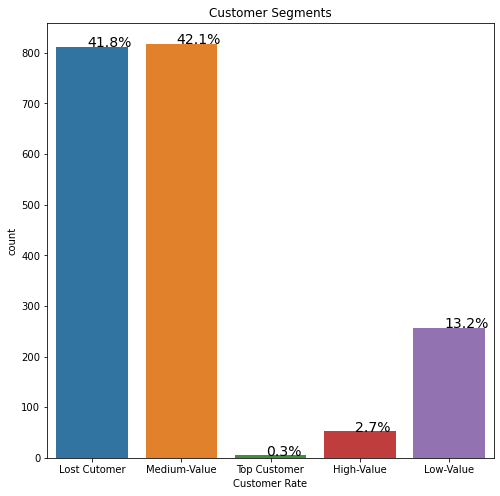

In [238]:
plt.figure(figsize=(8,8))
ax= sns.countplot(x='rate', data=df_1)
plt.xlabel('Customer Rate')
plt.title('Customer Segments')
bar_percentage(ax,df_1['rate'])

# Data Modeling 

## Part 1:

In [244]:
#Before start modeling, let's convert the categorical features to numerical. I will use dummy for this.
df_customer_class=df_1.copy()

In [245]:
df_customer_class=pd.get_dummies(df_customer_class)

In [246]:
df_customer_class.head()

customerid  next_purchase_date  recency  recency_clusters  frequency  \
0       13047                70.0       23                 0        172   
1       12583                26.0        3                 0        247   
2       13748               136.0      129                 2         28   
3       15291                77.0       69                 2        103   
4       14688                36.0       26                 0        327   

   frequency_clusters  monetary  monetary_clusters  overall_score  \
0                   0   3237.54                  0              0   
1                   2   7281.38                  0              2   
2                   0    948.25                  0              2   
3                   0   4668.30                  0              2   
4                   2   5630.87                  0              2   

   rate_High-Value  rate_Lost Cutomer  rate_Low-Value  rate_Medium-Value  \
0                0                  1               0                  0   
1                0                  0               0                  1   
2                0                  0               0                  1   
3                0                  0               0                  1   
4                0                  0               0                  1   

   rate_Top Customer  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

**Now to predicut if a customer will buy in the next 3 months, i will add a new feature that contains two values:</br>**
- 0 : customer takes more than 3 months to purchase again.</br>
- 1 : customer will purchase in the next 3 months.

In [247]:
df_customer_class['day_range'] = 1 
df_customer_class.loc[df_customer_class.next_purchase_date>90, 'day_range'] = 0

In [248]:
df_customer_class.head()

customerid  next_purchase_date  recency  recency_clusters  frequency  \
0       13047                70.0       23                 0        172   
1       12583                26.0        3                 0        247   
2       13748               136.0      129                 2         28   
3       15291                77.0       69                 2        103   
4       14688                36.0       26                 0        327   

   frequency_clusters  monetary  monetary_clusters  overall_score  \
0                   0   3237.54                  0              0   
1                   2   7281.38                  0              2   
2                   0    948.25                  0              2   
3                   0   4668.30                  0              2   
4                   2   5630.87                  0              2   

   rate_High-Value  rate_Lost Cutomer  rate_Low-Value  rate_Medium-Value  \
0                0                  1               0                  0   
1                0                  0               0                  1   
2                0                  0               0                  1   
3                0                  0               0                  1   
4                0                  0               0                  1   

   rate_Top Customer  day_range  
0                  0          1  
1                  0          1  
2                  0          0  
3                  0          1  
4                  0          1

Now, Let's split the dataset into training and testing sets. I am using 20% of the data for testing, and 80% for the training. 

In [249]:
#import 
from sklearn.model_selection import train_test_split

In [250]:
df_customer_class = df_customer_class.drop('next_purchase_date', axis=1)

In [251]:
X= df_customer_class.drop('day_range', axis=1)
y= df_customer_class.day_range


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Part 2:
For the modeling part, I am applying three diffrent models on the data to see which one do better compare to the others:</br>
- Logistic Reqression </br>
- Random Forest Classifier</br>
- KNN Classifier

In [264]:
#Logistic Reqression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
log_model.fit(X_train, y_train)

#predict results
y_pred = log_model.predict(X_test)

In [265]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8792


In [266]:
#classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       205
           1       0.85      0.90      0.88       184

    accuracy                           0.88       389
   macro avg       0.88      0.88      0.88       389
weighted avg       0.88      0.88      0.88       389



In [267]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8801


Since the value of ROC of this model approaches towards 1. It means that our classifier does a good job in predicting whether a customer will purchase within 3 months or not.

In [268]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators=100)


# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)

In [269]:
#Check accuracy  

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.8766


In [270]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       205
           1       0.86      0.89      0.87       184

    accuracy                           0.88       389
   macro avg       0.88      0.88      0.88       389
weighted avg       0.88      0.88      0.88       389



In [271]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

#Fit the model
knn.fit(X_train,y_train)

#preduct
y_pred = knn.predict(X_test)


In [272]:
#Check accuracy  
knn.score(X_test,y_test)

0.7480719794344473

In [273]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       205
           1       0.74      0.72      0.73       184

    accuracy                           0.75       389
   macro avg       0.75      0.75      0.75       389
weighted avg       0.75      0.75      0.75       389



# Conclusion

After applying 3 different models on our data, we can conclude that the Logistic Regression model ranked the highest accuracy and F1-score among the other models.